In [1]:
# ===========================
# === Load and Prepare Stock Data ===
# ===========================

import pandas as pd
df = pd.read_csv("../yfinance_data/AAPL_historical_data.csv")  
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [2]:
# ===========================
# ===Load  stock price data into a pandas DataFrame===
# ===========================

# Convert 'Date' column to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# Display structure
df.info()
 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10998 entries, 1980-12-12 to 2024-07-30
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10998 non-null  float64
 1   High          10998 non-null  float64
 2   Low           10998 non-null  float64
 3   Close         10998 non-null  float64
 4   Adj Close     10998 non-null  float64
 5   Volume        10998 non-null  int64  
 6   Dividends     10998 non-null  float64
 7   Stock Splits  10998 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 773.3 KB


In [3]:
# ===========================
# ===Load  stock price data into a pandas DataFrame===
# ===========================

import pandas as pd

df = pd.read_csv('../yfinance_data/AAPL_historical_data.csv') 

df['Date'] = pd.to_datetime(df['Date'])

df = df.sort_values('Date')

df.set_index('Date', inplace=True)

print(df.head())                     


                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  
Date                                 
1980-12-12        0.0           0.0  
1980-12-15        0.0           0.0  
1980-12-16        0.0           0.0  
1980-12-17        0.0           0.0  
1980-12-18        0.0           0.0  


In [4]:
# ===========================
# ===apply pandas_ta(I used instead of TALIB) to calculate moving averages, RSI (Relative Strength Index), and MACD (Moving Average Convergence Divergence===
# ===========================

#import pandas as pd
import pandas_ta as ta

# SMA - 20-day Simple Moving Average
df['SMA_20'] = ta.sma(df['Close'], length=20)

# EMA - 20-day Exponential Moving Average
df['EMA_20'] = ta.ema(df['Close'], length=20)

# RSI - Relative Strength Index
df['RSI_14'] = ta.rsi(df['Close'], length=14)

# MACD - Moving Average Convergence Divergence
macd = ta.macd(df['Close'], fast=12, slow=26, signal=9)
df = pd.concat([df, macd], axis=1)
# Now display the indicators you want to see:
print(df[['SMA_20', 'EMA_20', 'RSI_14', 'MACD_12_26_9', 'MACDh_12_26_9', 'MACDs_12_26_9']].tail(10))


                SMA_20      EMA_20     RSI_14  MACD_12_26_9  MACDh_12_26_9  \
Date                                                                         
2024-07-17  220.862000  221.987169  63.587172      8.463671       0.153260   
2024-07-18  221.356500  222.196009  56.919750      7.612783      -0.558103   
2024-07-19  222.088000  222.397341  57.053890      6.869748      -1.040910   
2024-07-22  222.911501  222.546167  56.543451      6.181391      -1.383414   
2024-07-23  223.755000  222.780817  57.764268      5.655396      -1.527527   
2024-07-24  224.228500  222.376929  48.687742      4.662717      -2.016164   
2024-07-25  224.440500  221.911508  47.386437      3.748082      -2.344640   
2024-07-26  224.633500  221.535174  48.055700      3.026267      -2.453164   
2024-07-29  225.014500  221.221349  48.476184      2.448591      -2.424672   
2024-07-30  225.117001  220.990744  49.359115      2.012764      -2.288399   

            MACDs_12_26_9  
Date                       
2024-07

d:\AI-projects\Solar-Challenge-Week1\.venv\Lib\site-packages\pandas_ta\__init__.py:7: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


               Open    High     Low   Close    Volume
Date                                                 
2025-05-30  199.370  201.96  196.78  200.85  70819942
2025-05-29  203.575  203.81  198.51  199.95  51477938
2025-05-28  200.590  202.73  199.90  200.42  45339678
2025-05-27  198.300  200.74  197.43  200.21  56288475
2025-05-23  193.665  197.70  193.46  195.27  78432918


<Axes: title={'center': 'AAPL Closing Price'}, xlabel='Date'>

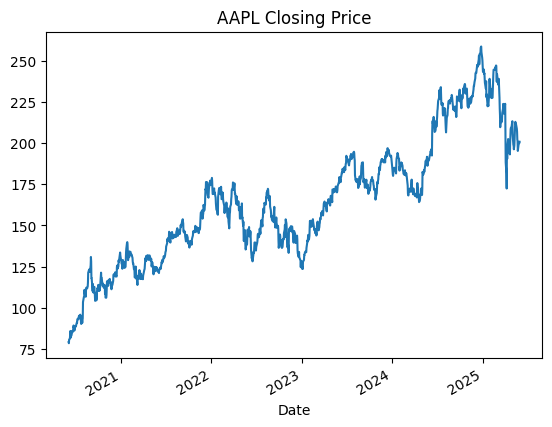

In [5]:
# ===========================
# ===Use PyNance for Financial Metrics===
# ===========================

import pynance as pn

# Download historical closing prices for Apple (AAPL)
aapl = pn.data.get('AAPL')

# Show the first 5 rows
print(aapl.head())

# Plot the closing price
aapl['Close'].plot(title='AAPL Closing Price')



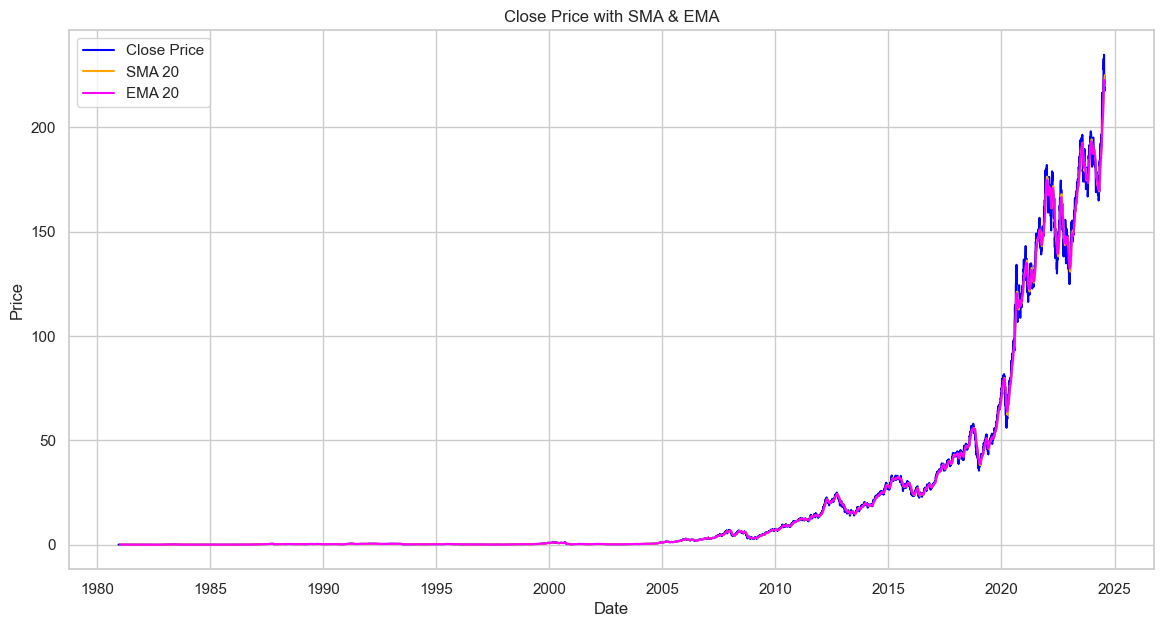

In [6]:
# ===========================
# ===Visualize data with Moving Averages===
# ===========================

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style='whitegrid')

# Plot Close Price with SMA and EMA
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_20'], label='SMA 20', color='orange')
plt.plot(df['EMA_20'], label='EMA 20', color='magenta')
plt.title('Close Price with SMA & EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


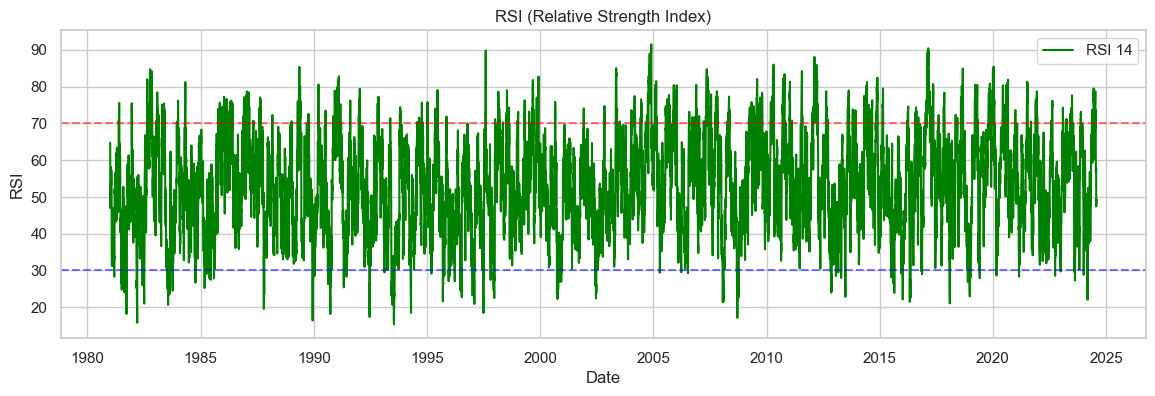

In [7]:
# ===========================
# ===Visualize data with RSI Plot===
# ===========================

plt.figure(figsize=(14, 4))
plt.plot(df['RSI_14'], label='RSI 14', color='green')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')  # Overbought
plt.axhline(30, linestyle='--', alpha=0.5, color='blue') # Oversold
plt.title('RSI (Relative Strength Index)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()


In [8]:
macd = ta.macd(df['Close'], fast=12, slow=26, signal=9)
print(macd.head())  # View first few rows



            MACD_12_26_9  MACDh_12_26_9  MACDs_12_26_9
Date                                                  
1980-12-12           NaN            NaN            NaN
1980-12-15           NaN            NaN            NaN
1980-12-16           NaN            NaN            NaN
1980-12-17           NaN            NaN            NaN
1980-12-18           NaN            NaN            NaN


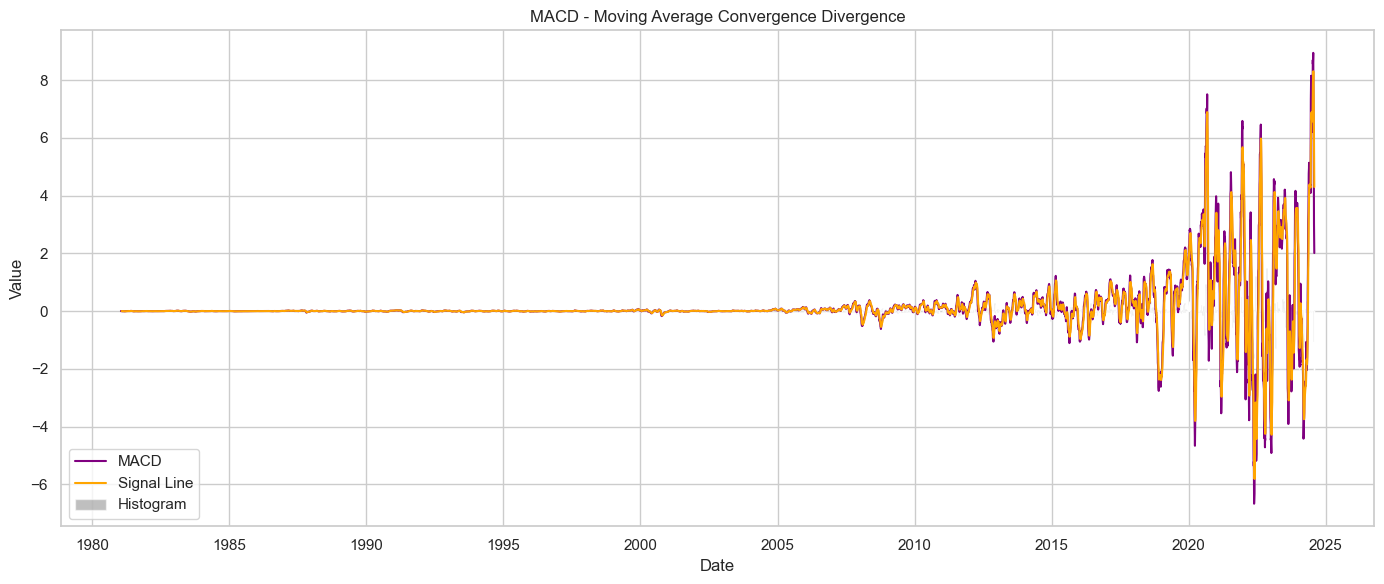

In [9]:
# ===========================
# ===Visualize data with MACD===
# ===========================

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['MACD_12_26_9'], label='MACD', color='purple')
plt.plot(df.index, df['MACDs_12_26_9'], label='Signal Line', color='orange')

# Use only the correct histogram column
histogram = df['MACDh_12_26_9']
if histogram.ndim == 2:
    histogram = histogram.iloc[:, 0]  # or change the index if needed

plt.bar(df.index, histogram, label='Histogram', color='gray', alpha=0.5)

plt.title('MACD - Moving Average Convergence Divergence')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


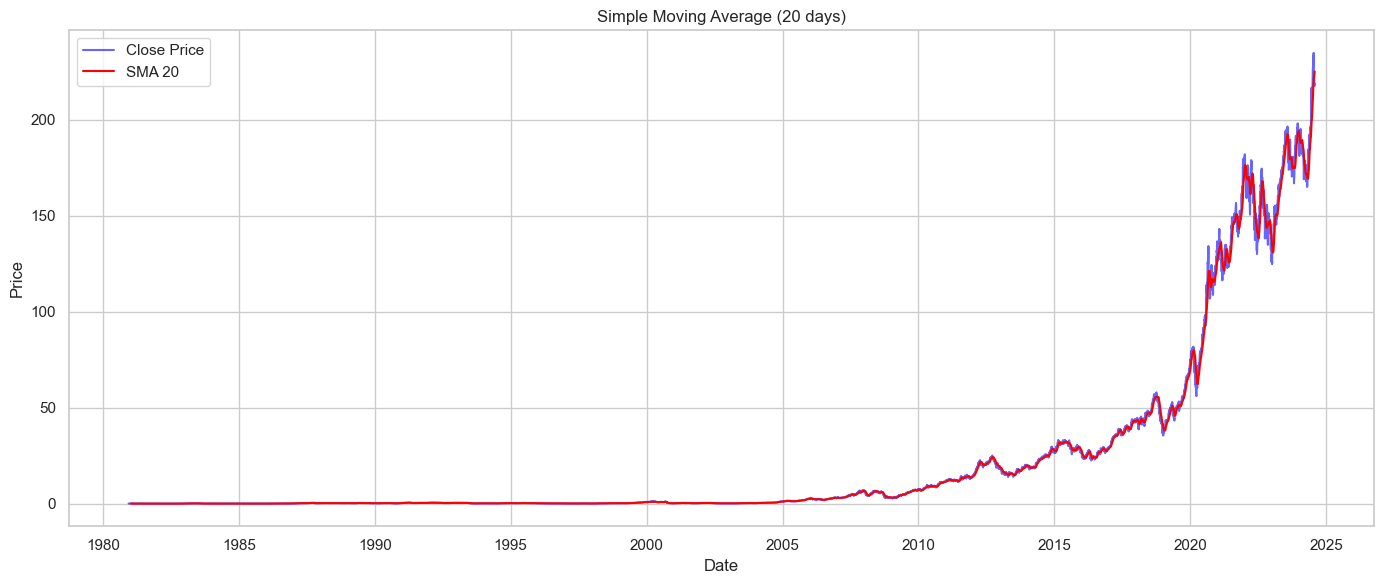

In [10]:
# ===========================
# ===Visualize data with SMA(Simple moving average-20 days)===
# ===========================

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(df.index, df['SMA_20'], label='SMA 20', color='red')
plt.title('Simple Moving Average (20 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


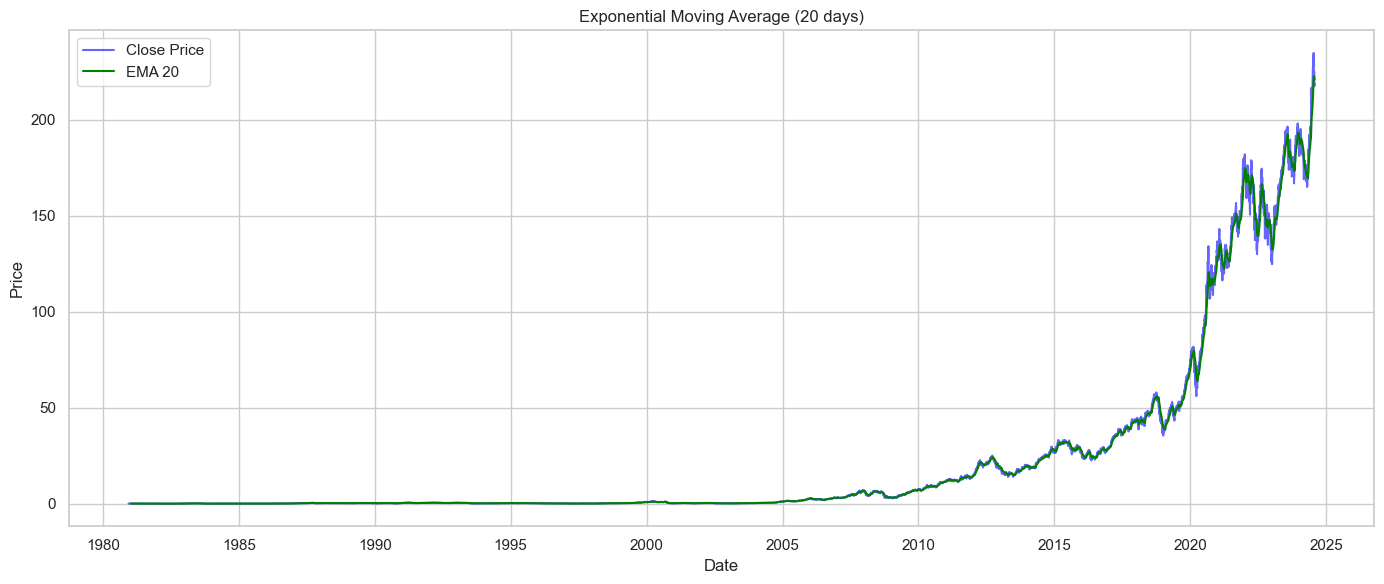

In [11]:
# ===========================
# === Plot the data with EMA(Exponential Moving Average – 20 Days)===
# ===========================

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(df.index, df['EMA_20'], label='EMA 20', color='green')
plt.title('Exponential Moving Average (20 days)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


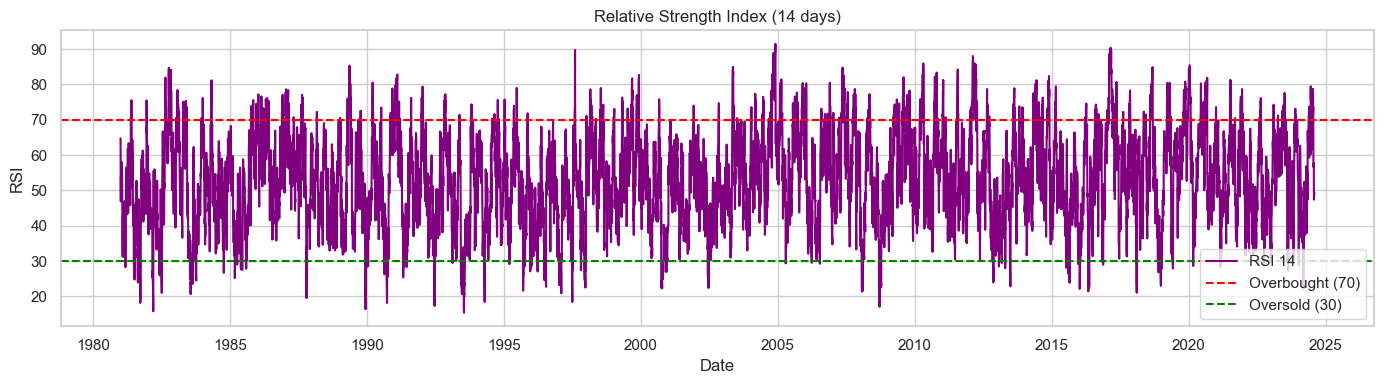

In [12]:
# ===========================
# === Plot the data with RSI (Relative Strength Index – 14 Days)===
# ===========================

plt.figure(figsize=(14, 4))
plt.plot(df.index, df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Overbought (70)')
plt.axhline(30, linestyle='--', color='green', label='Oversold (30)')
plt.title('Relative Strength Index (14 days)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


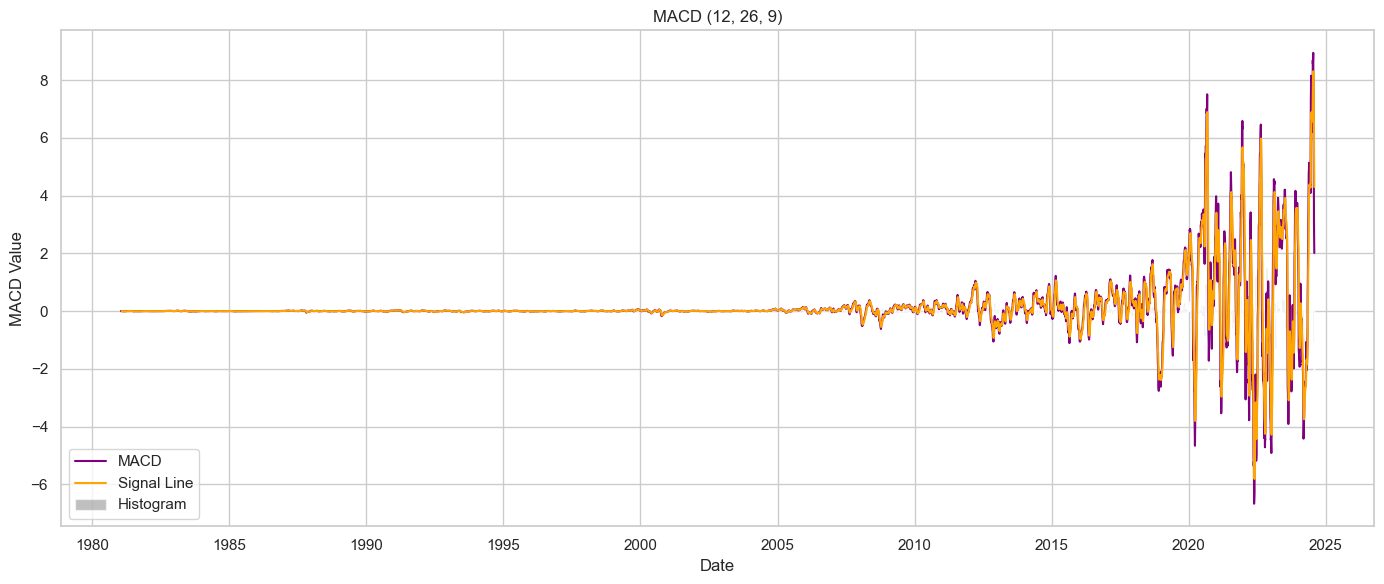

In [13]:
# ===========================
# === Plot the data with  MACD, Signal Line, and Histogram)===
# ===========================

plt.figure(figsize=(14, 6))

# MACD Line
plt.plot(df.index, df['MACD_12_26_9'], label='MACD', color='purple')

# Signal Line
plt.plot(df.index, df['MACDs_12_26_9'], label='Signal Line', color='orange')

# Histogram
hist = df['MACDh_12_26_9']
if hist.ndim == 2:
    hist = hist.iloc[:, 0]  # adjust if needed
plt.bar(df.index, hist, label='Histogram', color='gray', alpha=0.5)

plt.title('MACD (12, 26, 9)')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
